In [29]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [8]:
df = pd.read_csv(
    '../data/ICMS_nominal.csv',
    index_col=[0]
)
df = df[['ICMS Nominal milhões de reais']]
df.columns = ["ICMS"]
df

,ICMS
1994-01-31,943.285631
1994-02-28,736.846597
1994-03-31,999.192022
1994-04-30,930.323924
1994-05-31,891.347049
...,...
2019-12-31,14602.358693
2020-01-31,13082.640610
2020-02-29,11927.616739
2020-03-31,12214.580916


# Markov switching dynamic regression models

/home/gpetrini/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Expected durations: 28.35100219729981 years and 23.441316448220107 years respectively


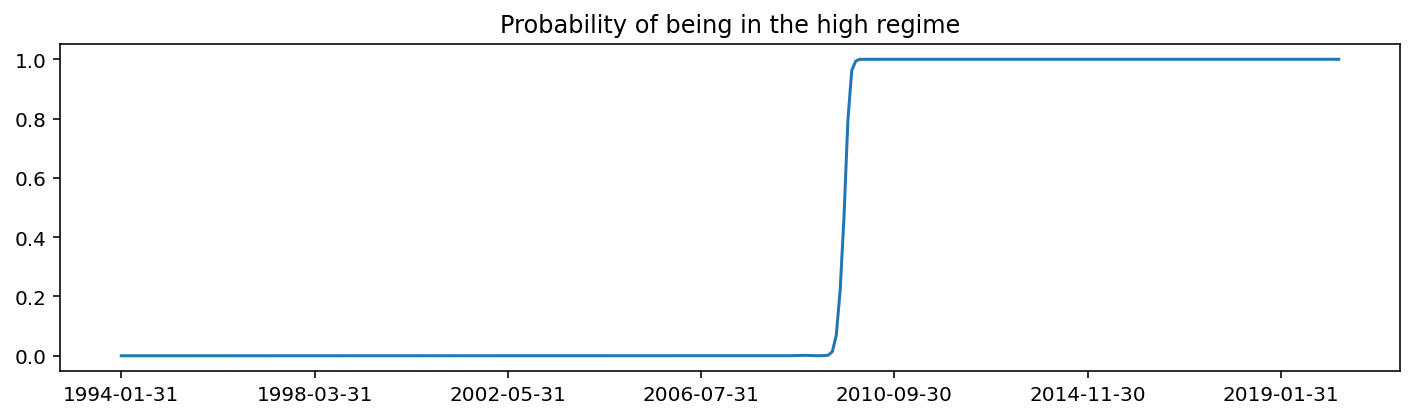

In [23]:
model = sm.tsa.MarkovRegression(df, k_regimes=2,)
res = model.fit()
res.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,3))
res.summary()
print(f"Expected durations: {res.expected_durations[0]/12} years and {res.expected_durations[1]/12} years respectively")

# Exponential smoothing

/home/gpetrini/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/home/gpetrini/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/home/gpetrini/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


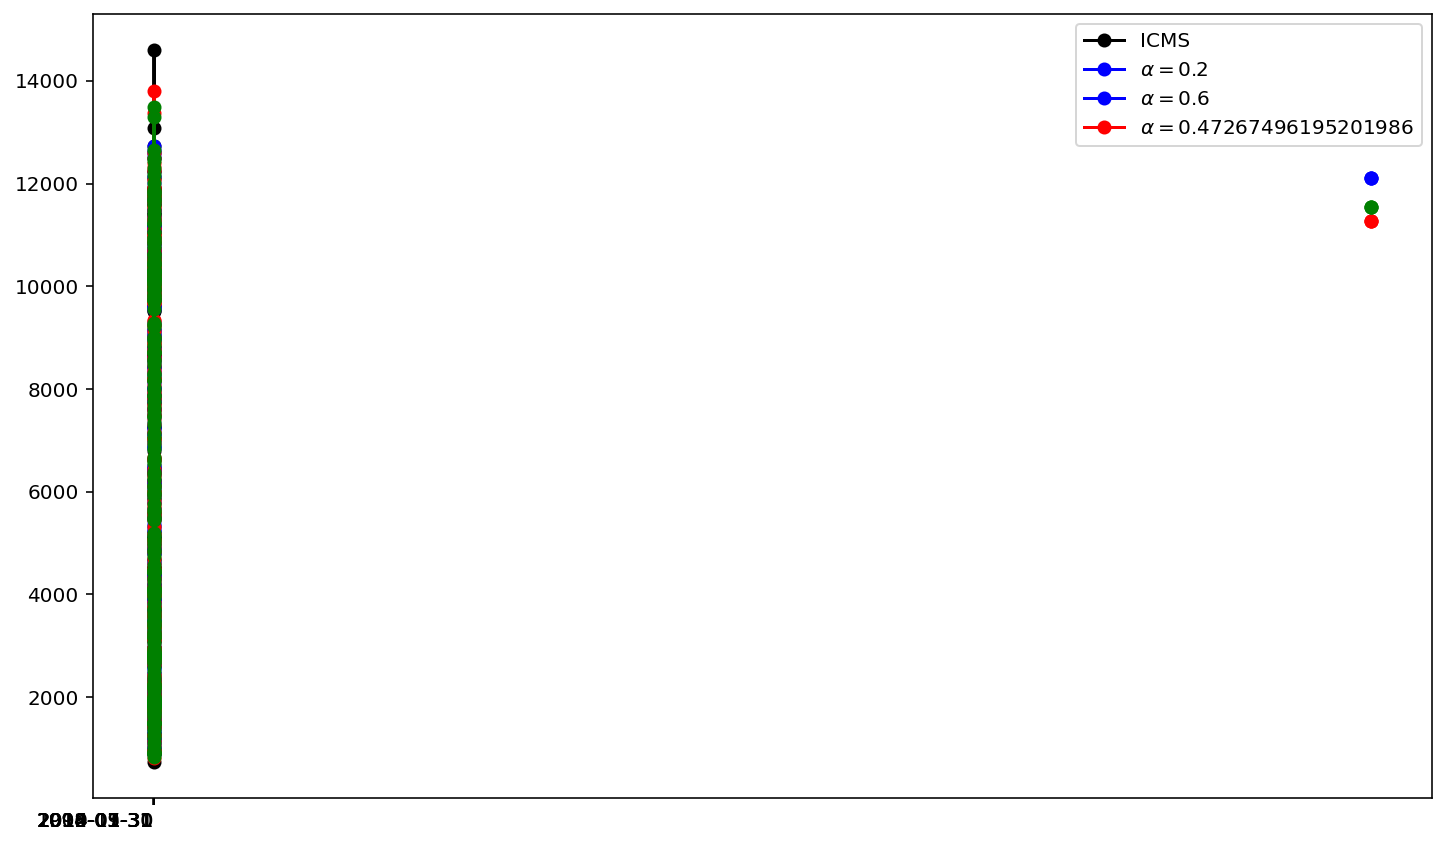

In [27]:
fit1 = SimpleExpSmoothing(df["ICMS"]).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(df).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(df).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = df.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.show()

# ARIMA

/home/gpetrini/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/home/gpetrini/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
No handles with labels found to put in legend.


                            AutoReg Model Results                             
Dep. Variable:                   ICMS   No. Observations:                  316
Model:               Seas. AutoReg(3)   Log Likelihood               -2271.789
Method:               Conditional MLE   S.D. of innovations            343.495
Date:                Thu, 14 May 2020   AIC                             11.781
Time:                        18:45:05   BIC                             11.972
Sample:                    04-30-1994   HQIC                            11.857
                         - 04-30-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -195.0353     95.002     -2.053      0.040    -381.236      -8.835
seasonal.1   -304.3349    129.529     -2.350      0.019    -558.208     -50.462
seasonal.2     99.2925    127.750      0.777    

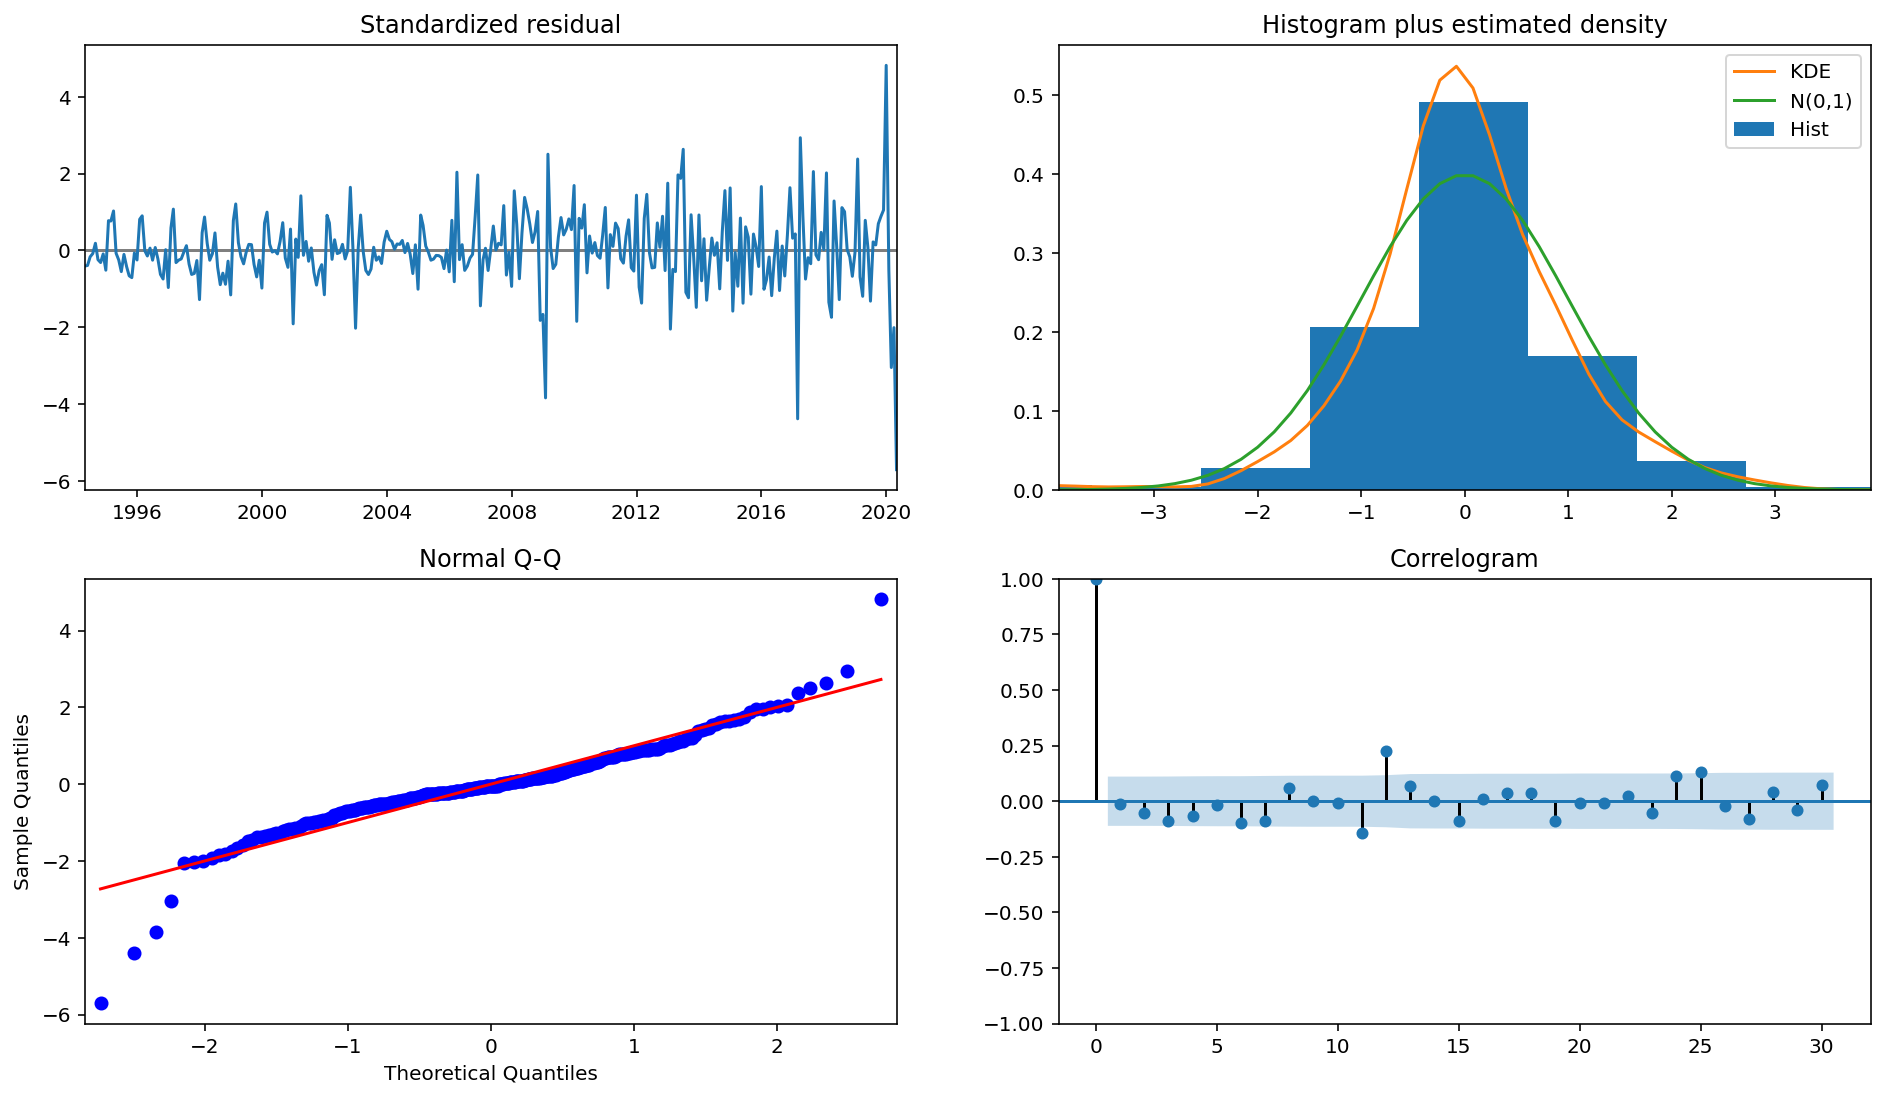

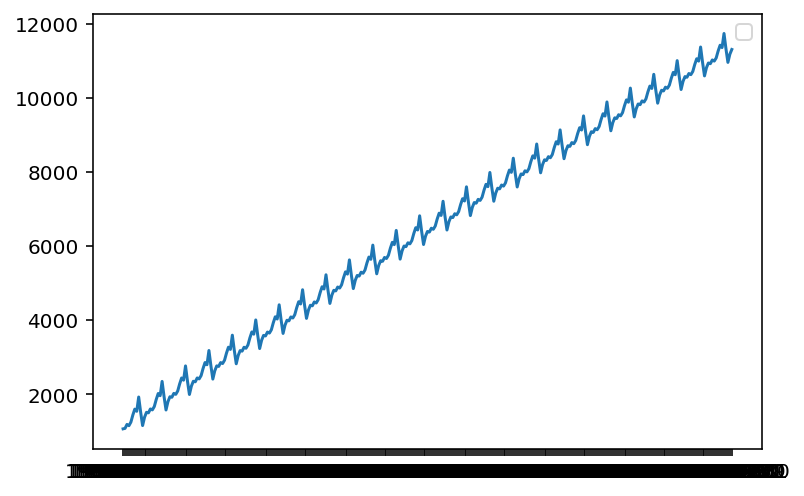

In [38]:
sel = ar_select_order(df, 13, seasonal=True)
sel.ar_lags
res = sel.model.fit(cov_type="HC0")
print(res.summary())
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)
fig = res.plot_predict(dynamic=True)